In [1]:
import numpy as np
#from numba import jit
from pylidar import lidarprocessor
from pylidar.toolbox import spatial
from pylidar.lidarformats import pulsewaves
from pylidar.lidarformats import generic
from pylidar import userclasses as uc
from matplotlib import pyplot as plt
#import pickle
import time

In [2]:
## here are some processing functions:
# readChunk() reads the data chunk by chunk
# appendChunk() appends each chunk to a list

# define a function to append the chunk
# @jit doesnt help here
def appendChunk(otherArgs):
    
    otherArgs.allWaveInfo.append(otherArgs.waveinfo)
    otherArgs.allRecv.append(otherArgs.recv)
    otherArgs.allTrans.append(otherArgs.trans)
    otherArgs.allPulses.append(otherArgs.pulses)

# define a function to read the data
def readChunk(data, otherArgs):
    # returns 2d masked structured array with info about waveforms
    # first axis is waveform number, second is pulse
    #waveinfo = data.input1.getWaveformInfo()
    otherArgs.waveinfo = data.input1.getWaveformInfo()
    
    # returns masked 3d radiance array
    # first axis is waveform bin, second is waveform number, third is pulse
    otherArgs.recv = data.input1.getReceived()
    otherArgs.trans = data.input1.getTransmitted()
    otherArgs.pulses = data.input1.getPulses()
    
    # call the append function
    appendChunk(otherArgs)


In [3]:
inFile = r"C:\Projects\RD\NEON_data\NIWO\waveform\NEON_D13_NIWO_DP1_L001-1_2017090415_translate_1.pls"

# get some information about the file
pw_info = pulsewaves.PulseWavesFileInfo(inFile)
header = pw_info.header

# define the object for processing
dataFiles = lidarprocessor.DataFiles()
dataFiles.input1 = lidarprocessor.LidarFile(inFile, lidarprocessor.READ)

# define the object to hold the data
otherArgs = lidarprocessor.OtherArgs()
otherArgs.waveinfo = 0
otherArgs.recv = 1
otherArgs.trans = 2
otherArgs.pulses = 3
otherArgs.allWaveInfo = []
otherArgs.allRecv = []
otherArgs.allTrans = []
otherArgs.allPulses = []

t0 = time.time()
lidarprocessor.doProcessing(readChunk, dataFiles, otherArgs=otherArgs)
t1 = time.time()

print('read file in {} seconds / {} minutes'.format(t1-t0, (t1-t0)/60))

read file in 836.305000067 seconds / 13.9384166678 minutes


In [4]:
# check the length of the lists
print(len(otherArgs.allWaveInfo))
print(len(otherArgs.allRecv))
print(len(otherArgs.allTrans))


138
138
138


In [5]:
# check the shapes of some of the items
for i in range(0,138,10) + [-1]:
    rec_shp = otherArgs.allRecv[i].shape
    trans_shp = otherArgs.allTrans[i].shape
    print('list {} recv shape is {}'.format(i, rec_shp))
    print('list {} trans shape is {}'.format(i, trans_shp))
    print('')

list 0 recv shape is (136L, 3L, 65536L)
list 0 trans shape is (48L, 3L, 65536L)

list 10 recv shape is (136L, 3L, 65536L)
list 10 trans shape is (48L, 3L, 65536L)

list 20 recv shape is (112L, 3L, 65536L)
list 20 trans shape is (48L, 3L, 65536L)

list 30 recv shape is (120L, 3L, 65536L)
list 30 trans shape is (48L, 3L, 65536L)

list 40 recv shape is (120L, 3L, 65536L)
list 40 trans shape is (48L, 3L, 65536L)

list 50 recv shape is (120L, 3L, 65536L)
list 50 trans shape is (48L, 3L, 65536L)

list 60 recv shape is (128L, 3L, 65536L)
list 60 trans shape is (48L, 3L, 65536L)

list 70 recv shape is (88L, 2L, 65536L)
list 70 trans shape is (48L, 2L, 65536L)

list 80 recv shape is (104L, 3L, 65536L)
list 80 trans shape is (48L, 3L, 65536L)

list 90 recv shape is (80L, 2L, 65536L)
list 90 trans shape is (48L, 2L, 65536L)

list 100 recv shape is (80L, 2L, 65536L)
list 100 trans shape is (48L, 2L, 65536L)

list 110 recv shape is (144L, 3L, 65536L)
list 110 trans shape is (48L, 3L, 65536L)

list 

In [31]:
# get some sample waveform indexes from the first batch
ex=[]
r = otherArgs.allRecv[0].shape[-1]
for i in range(r):

    # get the relative maxima locations
    x = otherArgs.allRecv[0][:,1,i]
    amax = (x[1:-1] > x[:-2]) & (x[1:-1] > x[2:])
    locs = np.arange(1, x.size-1)[amax]
    
    # this grabs the index if there are more than 10 relative maxima..
    # data is noisy though
    if locs.size > 10 and otherArgs.allPulses[0][i]['NUMBER_OF_WAVEFORM_SAMPLES'] <=2:
        #print (x[amax])
        if x[amax][x[amax]>260].size > 2:
            ex.append(i)
    
print ex   

[56, 435, 644, 648, 666, 1097, 1287, 1314, 1771, 1782, 2227, 2313, 2414, 2730, 2834, 3553, 4121, 4130, 5245, 6195, 7410, 7892, 8572, 8609, 8610, 11506, 11920, 12048, 12451, 12537, 13637, 14175, 14704, 15354, 15451, 15896, 16014, 16015, 16595, 17071, 18629, 18643, 19314, 20018, 22183, 23330, 23837, 24601, 24887, 24936, 25549, 25583, 26049, 26063, 26220, 26496, 27807, 27811, 27812, 27884, 28481, 28896, 31743, 32158, 32187, 33511, 34073, 34517, 34651, 34760, 35213, 35548, 35780, 35788, 35958, 36215, 36994, 37576, 37865, 38033, 38058, 38117, 38121, 38128, 38180, 38563, 38607, 38620, 38649, 39221, 39249, 40125, 40134, 41428, 41541, 42589, 43507, 43703, 44211, 44829, 45315, 46636, 47104, 47571, 48099, 48328, 48734, 48897, 49152, 49202, 49203, 49855, 50485, 50491, 50499, 50977, 51364, 51392, 51613, 51655, 52062, 52325, 52727, 52786, 53184, 53714, 53848, 53865, 53886, 54335, 54853, 54920, 54961, 54994, 55004, 55371, 55462, 55602, 55815, 56157, 58245, 58353, 58354, 58457, 60224, 60395, 60397, 6

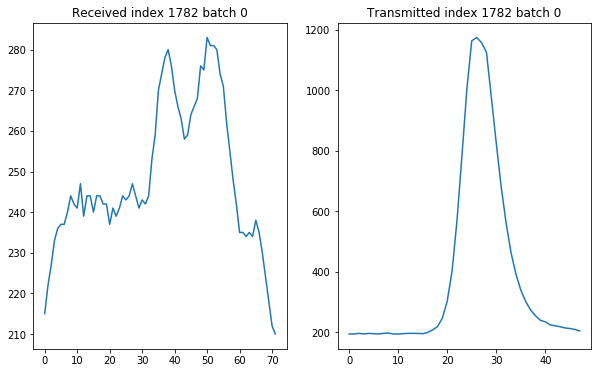

In [32]:
#plot the received and trasmitted pulses
id = ex[9]
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(otherArgs.allRecv[0][:,1,id])
plt.title('Received index {} batch 0'.format(id))
plt.subplot(1,2,2)
plt.plot(otherArgs.allTrans[0][:,0,id])
plt.title('Transmitted index {} batch 0'.format(id))

plt.show()


In [8]:
import pprint
print('waveinfo\n')
pprint.pprint(otherArgs.allWaveInfo[0][:,id].dtype.names) #['RANGE_TO_WAVEFORM_START']
print('\nheader\n')
pprint.pprint(header.keys())
print(header['NUMBER_OF_APPENDED_VARIABLE_LENGTH_RECORDS'])


waveinfo

('NUMBER_OF_WAVEFORM_RECEIVED_BINS',
 'RECEIVED_START_IDX',
 'NUMBER_OF_WAVEFORM_TRANSMITTED_BINS',
 'TRANSMITTED_START_IDX',
 'RANGE_TO_WAVEFORM_START',
 'CHANNEL',
 'RECEIVE_WAVE_GAIN',
 'RECEIVE_WAVE_OFFSET',
 'TRANS_WAVE_GAIN',
 'TRANS_WAVE_OFFSET')

header

['SYSTEM_IDENTIFIER',
 'PULSE_ATTRIBUTES',
 'FILE_CREATION_DAY',
 'HEADER_SIZE',
 'PROJECT_ID_GUID_DATA_1',
 'PROJECT_ID_GUID_DATA_3',
 'PROJECT_ID_GUID_DATA_2',
 'FILE_SOURCE_ID',
 'NUMBER_OF_VARIABLE_LENGTH_RECORDS',
 'X_MAX',
 'FILE_CREATION_YEAR',
 'GENERATING_SOFTWARE',
 'GLOBAL_PARAMETERS',
 'Y_MAX',
 'Z_MAX',
 'OFFSET_TO_PULSE_DATA',
 'Y_MIN',
 'Z_MIN',
 'PULSE_SIZE',
 'NUMBER_OF_APPENDED_VARIABLE_LENGTH_RECORDS',
 'FILE_SIGNATURE',
 'PULSE_COMPRESSION',
 'NUMBER_OF_PULSES',
 'X_MIN',
 'PULSE_FORMAT',
 'PROJECT_ID_GUID_DATA_4']
0


In [9]:
ex_wf_start = otherArgs.allWaveInfo[0][:,id]['RANGE_TO_WAVEFORM_START']
print('ex. RANGE_TO_WAVEFORM_START: {}'.format(ex_wf_start))

ex. RANGE_TO_WAVEFORM_START: [0.0 7253.0 --]


In [10]:
temp = otherArgs.allPulses[0][id].dtype
names = temp.names

print('info for waveform {} in batch 0'.format(id))
for n in names:
    print('{}: {}'.format(n, otherArgs.allPulses[0][id][n]))


info for waveform 1782 in batch 0
TIME: 152851036938
OFFSET: 378694
X_ORIGIN: 441448.81
Y_ORIGIN: 4434347.65
Z_ORIGIN: 4507.53
X_TARGET: 441459.94
Y_TARGET: 4434358.96
Z_TARGET: 4358.48
FIRST_RETURNING_SAMPLE: 7253
LAST_RETURNING_SAMPLE: 7324
DESCRIPTOR_INDEX: 2
INTENSITY: 6
WFM_START_IDX: 3599
NUMBER_OF_WAVEFORM_SAMPLES: 2
NUMBER_OF_RETURNS: 1
PTS_START_IDX: 1782


In [11]:
otherArgs.allTrans[0][:,:,id].T

masked_array(data =
 [[195 195 197 195 197 196 195 197 198 195 195 196 197 197 197 196 200 208
  219 247 303 404 571 782 1002 1163 1174 1157 1125 976 825 681 562 464 393
  340 302 274 255 240 235 225 222 219 215 213 210 205]
 [-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --]
 [-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --]],
             mask =
 [[False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  

In [12]:
# find returned pulses that have more than one segment
m_seg=[]
r = otherArgs.allRecv[0].shape[-1]
for i in range(r):

    # get the relative maxima locations
    x = otherArgs.allPulses[0][i]['NUMBER_OF_WAVEFORM_SAMPLES']
        
    # this grabs the index if there are more than 2 samples. 
    # 1 sample for the Tx, up to 2 samples for the Rx
    if x > 2:
        m_seg.append(i)
        
#print m_seg

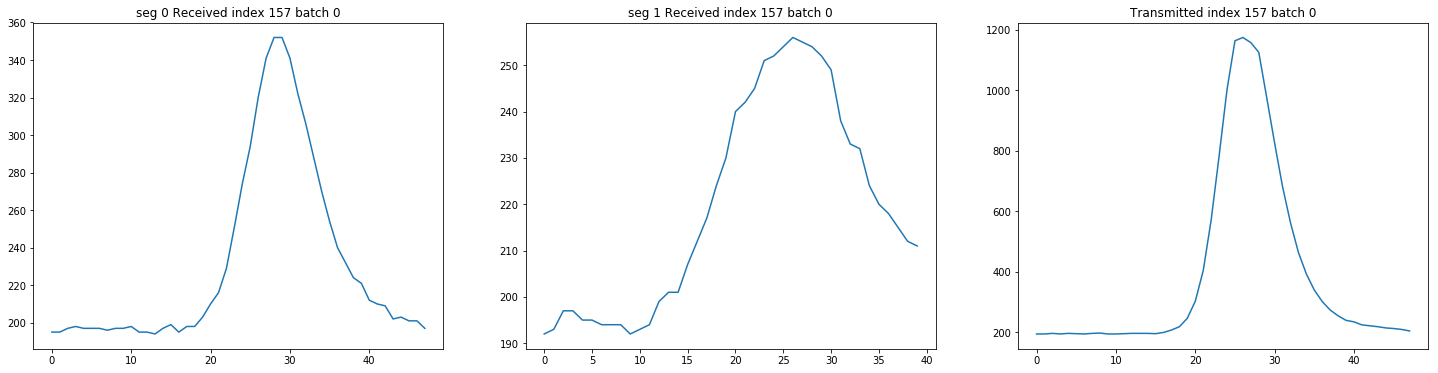

In [13]:
mseg_id = m_seg[5]
plt.figure(figsize=(25,6))
plt.subplot(1,3,1)
plt.plot(otherArgs.allRecv[0][:,2,mseg_id])
plt.title('seg 0 Received index {} batch 0'.format(mseg_id))
plt.subplot(1,3,2)
plt.plot(otherArgs.allRecv[0][:,1,mseg_id])
plt.title('seg 1 Received index {} batch 0'.format(mseg_id))
plt.subplot(1,3,3)
plt.plot(otherArgs.allTrans[0][:,0,id])
plt.title('Transmitted index {} batch 0'.format(mseg_id))

plt.show()

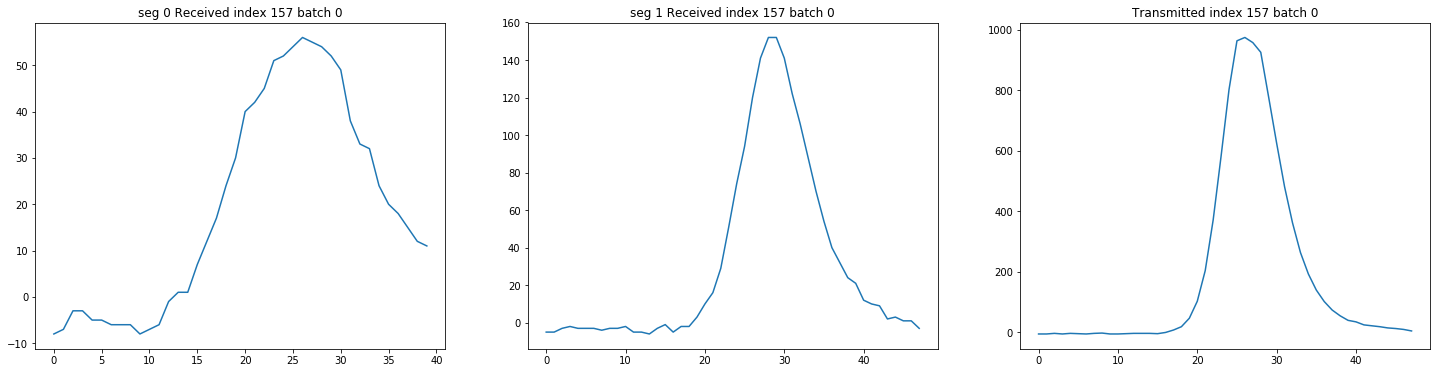

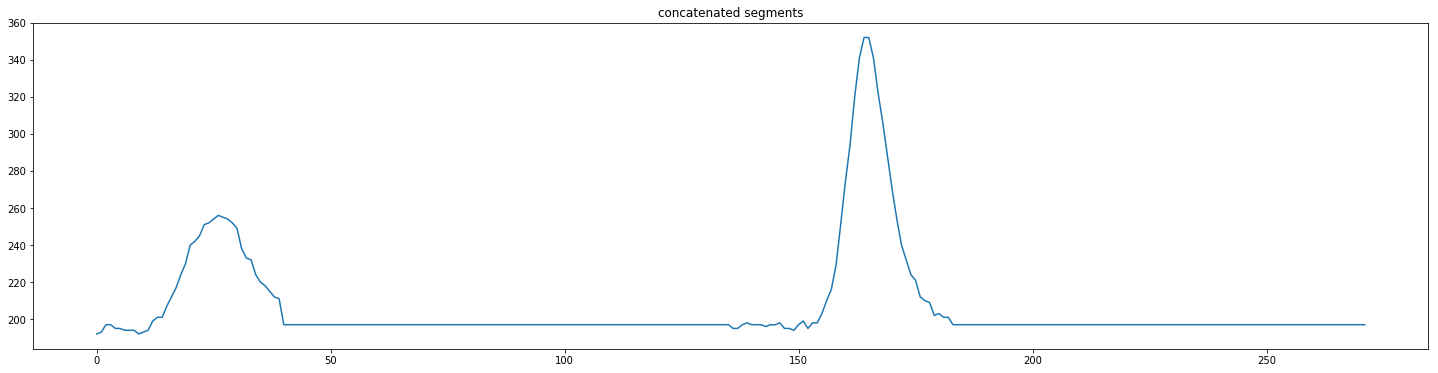

shape of concatenated segments is (272L,)


In [14]:
# plot the same as above, subtracting a constant noise term. Also concatenate the segments together.
# NOTE: this may not be completely accurate. Incorporate timing info

mseg_id = m_seg[5]
constant_noise = 200
seg0 = otherArgs.allRecv[0][:,1,mseg_id]
seg1 = otherArgs.allRecv[0][:,2,mseg_id]
tx = otherArgs.allTrans[0][:,0,id]
plt.figure(figsize=(25,6))
plt.subplot(1,3,1)
plt.plot(seg0 - constant_noise)
plt.title('seg 0 Received index {} batch 0'.format(mseg_id))
plt.subplot(1,3,2)
plt.plot(seg1 - constant_noise)
plt.title('seg 1 Received index {} batch 0'.format(mseg_id))
plt.subplot(1,3,3)
plt.plot(tx - constant_noise)
plt.title('Transmitted index {} batch 0'.format(mseg_id))

plt.show()

# concatenate the segments together
full_seg = np.hstack((seg0, seg1))

plt.figure(figsize=(25,6))
plt.plot(full_seg)
#plt.plot((tx), 'r')
plt.title('concatenated segments')
plt.show()

print('shape of concatenated segments is {}'.format(full_seg.shape))




In [15]:
print(otherArgs.allWaveInfo[0][:,mseg_id]['TRANS_WAVE_GAIN'])
print(otherArgs.allWaveInfo[0][:,mseg_id]['TRANS_WAVE_OFFSET'])

[1.0 1.0 1.0]
[0.0 0.0 0.0]


In [16]:
temp = otherArgs.allPulses[0][mseg_id].dtype
names = temp.names

print('info for waveform {} in batch 0'.format(mseg_id))
for n in names:
    print('{}: {}'.format(n, otherArgs.allPulses[0][mseg_id][n]))

info for waveform 157 in batch 0
TIME: 152851003177
OFFSET: 34486
X_ORIGIN: 441447.36
Y_ORIGIN: 4434348.59
Z_ORIGIN: 4507.62
X_TARGET: 441447.99
Y_TARGET: 4434344.09
Z_TARGET: 4357.79
FIRST_RETURNING_SAMPLE: 7789
LAST_RETURNING_SAMPLE: 7916
DESCRIPTOR_INDEX: 3
INTENSITY: 13
WFM_START_IDX: 319
NUMBER_OF_WAVEFORM_SAMPLES: 3
NUMBER_OF_RETURNS: 1
PTS_START_IDX: 157


In [18]:
header['NUMBER_OF_VARIABLE_LENGTH_RECORDS']

6L

In [19]:
header['NUMBER_OF_APPENDED_VARIABLE_LENGTH_RECORDS']

0L

In [34]:
# id = ex[9]
id = ex[4]

a = otherArgs.allPulses[0][id]['FIRST_RETURNING_SAMPLE']
b = otherArgs.allPulses[0][id]['LAST_RETURNING_SAMPLE']
c = b-a
print(c)

a = otherArgs.allPulses[0][mseg_id]['FIRST_RETURNING_SAMPLE']
b = otherArgs.allPulses[0][mseg_id]['LAST_RETURNING_SAMPLE']
c = b-a
print(c)

111
127


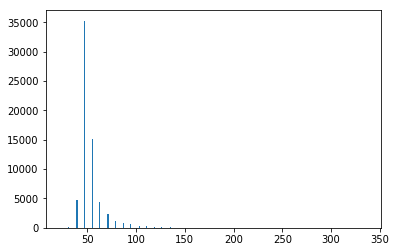

In [42]:
# this looks like the duration
durations = [p['LAST_RETURNING_SAMPLE'] - p['FIRST_RETURNING_SAMPLE'] for p in otherArgs.allPulses[0]]

plt.hist(durations, bins=255)
plt.show()

In [39]:
len(durations)

65536

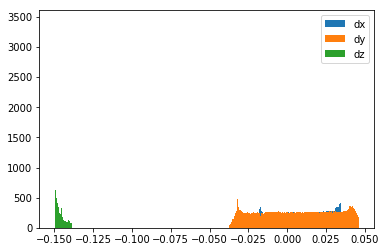

In [47]:
# plot the unit vector distribution
dx = [(p['X_TARGET'] - p['X_ORIGIN']) / 1000 for p in otherArgs.allPulses[0]]
dy = [(p['Y_TARGET'] - p['Y_ORIGIN']) / 1000 for p in otherArgs.allPulses[0]]
dz = [(p['Z_TARGET'] - p['Z_ORIGIN']) / 1000 for p in otherArgs.allPulses[0]]

plt.hist(dx, bins=255, label='dx')
plt.hist(dy, bins=255, label='dy')
plt.hist(dz, bins=255, label='dz')
plt.legend()
plt.show()

In [49]:
# get the first returning sample
x_first = [p['X_ORIGIN'] + p['FIRST_RETURNING_SAMPLE']*dx[i] for i,p in enumerate(otherArgs.allPulses[0])]
y_first = [p['Y_ORIGIN'] + p['FIRST_RETURNING_SAMPLE']*dy[i] for i,p in enumerate(otherArgs.allPulses[0])]
z_first = [p['Z_ORIGIN'] + p['FIRST_RETURNING_SAMPLE']*dz[i] for i,p in enumerate(otherArgs.allPulses[0])]

# get the last returning sample
x_last = [p['X_ORIGIN'] + p['LAST_RETURNING_SAMPLE']*dx[i] for i,p in enumerate(otherArgs.allPulses[0])]
y_last = [p['Y_ORIGIN'] + p['LAST_RETURNING_SAMPLE']*dy[i] for i,p in enumerate(otherArgs.allPulses[0])]
z_last = [p['Z_ORIGIN'] + p['LAST_RETURNING_SAMPLE']*dz[i] for i,p in enumerate(otherArgs.allPulses[0])]


X_LAST: 441507.9752
X_FIRST: 441507.0761
Y_LAST: 4434399.79036
Y_FIRST: 4434399.03223
Z_LAST: 3387.41616
Z_FIRST: 3404.01288
Segments: 3. (if 2, one Tx, one Rx. if 3, there are 2 Rx)
Duration: 111
seg0 len: 40 (masked)
seg1 len: 40 (masked)
seg0 len: 136 (unmasked)
seg1 len: 136 (unmasked)


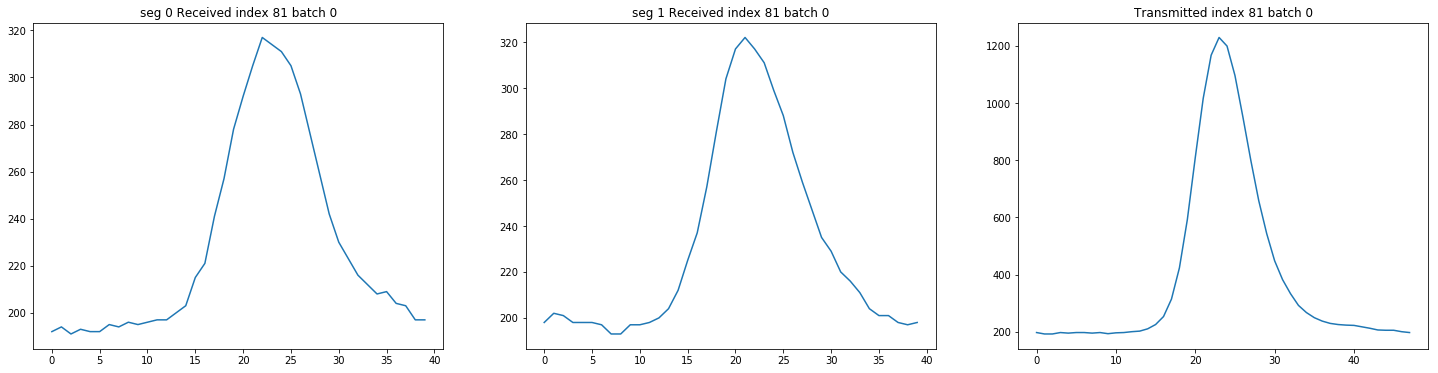

info for waveform 81 in batch 0
TIME: 152851001658
OFFSET: 18448
X_ORIGIN: 441447.29
Y_ORIGIN: 4434348.62
Z_ORIGIN: 4507.62
X_TARGET: 441455.39
Y_TARGET: 4434355.45
Z_TARGET: 4358.1
FIRST_RETURNING_SAMPLE: 7381
LAST_RETURNING_SAMPLE: 7492
DESCRIPTOR_INDEX: 3
INTENSITY: 15
WFM_START_IDX: 166
NUMBER_OF_WAVEFORM_SAMPLES: 3
NUMBER_OF_RETURNS: 1
PTS_START_IDX: 81


In [82]:
id = m_seg[4]
print('X_LAST: {}'.format(x_last[id]))
print('X_FIRST: {}'.format(x_first[id]))
print('Y_LAST: {}'.format(y_last[id]))
print('Y_FIRST: {}'.format(y_first[id]))
print('Z_LAST: {}'.format(z_last[id]))
print('Z_FIRST: {}'.format(z_first[id]))
print('Segments: {}. (if 2, one Tx, one Rx. if 3, there are 2 Rx)'.format(otherArgs.allPulses[0][id]['NUMBER_OF_WAVEFORM_SAMPLES']))
print('Duration: {}'.format(durations[id]))

if otherArgs.allPulses[0][id]['NUMBER_OF_WAVEFORM_SAMPLES']>2:
    seg0_masked_len = otherArgs.allRecv[0][:,1,id].count()
    seg1_masked_len = otherArgs.allRecv[0][:,2,id].count()
    seg0_len = otherArgs.allRecv[0][:,1,id].size
    seg1_len = otherArgs.allRecv[0][:,2,id].size
    print('seg0 len: {} (masked)'.format(seg0_masked_len))
    print('seg1 len: {} (masked)'.format(seg1_masked_len))
    print('seg0 len: {} (unmasked)'.format(seg0_len))
    print('seg1 len: {} (unmasked)'.format(seg1_len))
    
    
plot = True
if plot:
    seg0 = otherArgs.allRecv[0][:,1,id]
    seg1 = otherArgs.allRecv[0][:,2,id]
    tx = otherArgs.allTrans[0][:,0,id]
    plt.figure(figsize=(25,6))
    plt.subplot(1,3,1)
    plt.plot(seg0)
    plt.title('seg 0 Received index {} batch 0'.format(id))
    plt.subplot(1,3,2)
    plt.plot(seg1)
    plt.title('seg 1 Received index {} batch 0'.format(id))
    plt.subplot(1,3,3)
    plt.plot(tx)
    plt.title('Transmitted index {} batch 0'.format(id))

    plt.show()
    
print('info for waveform {} in batch 0'.format(id))
for n in names:
    print('{}: {}'.format(n, otherArgs.allPulses[0][id][n]))

In [91]:
otherArgs.allWaveInfo[0]


masked_array(data =
 [[(0L, 0L, 48L, 0L, 0.0, 0, 1.0, 0.0, 1.0, 0.0)
  (0L, 0L, 48L, 48L, 0.0, 0, 1.0, 0.0, 1.0, 0.0)
  (0L, 0L, 48L, 96L, 0.0, 0, 1.0, 0.0, 1.0, 0.0) ...,
  (0L, 0L, 48L, 3087728L, 0.0, 0, 1.0, 0.0, 1.0, 0.0)
  (0L, 0L, 48L, 3087776L, 0.0, 0, 1.0, 0.0, 1.0, 0.0)
  (0L, 0L, 48L, 3087824L, 0.0, 0, 1.0, 0.0, 1.0, 0.0)]
 [(48L, 0L, 0L, 0L, 7085.0, 0, 1.0, 0.0, 1.0, 0.0)
  (48L, 48L, 0L, 0L, 7093.0, 0, 1.0, 0.0, 1.0, 0.0)
  (48L, 96L, 0L, 0L, 7093.0, 0, 1.0, 0.0, 1.0, 0.0) ...,
  (64L, 3494008L, 0L, 0L, 6949.0, 0, 1.0, 0.0, 1.0, 0.0)
  (64L, 3494072L, 0L, 0L, 6965.0, 0, 1.0, 0.0, 1.0, 0.0)
  (64L, 3494136L, 0L, 0L, 6997.0, 0, 1.0, 0.0, 1.0, 0.0)]
 [(--, --, --, --, --, --, --, --, --, --)
  (--, --, --, --, --, --, --, --, --, --)
  (--, --, --, --, --, --, --, --, --, --) ...,
  (--, --, --, --, --, --, --, --, --, --)
  (--, --, --, --, --, --, --, --, --, --)
  (--, --, --, --, --, --, --, --, --, --)]],
             mask =
 [[(False, False, False, False, False, False, F

In [95]:
# duration?
otherArgs.allWaveInfo[0][:,id]['RECEIVED_START_IDX'] 

masked_array(data = [0L 4856L 4896L],
             mask = [False False False],
       fill_value = 999999)

In [96]:
# duration is above minus this?
otherArgs.allWaveInfo[0][:,id]['TRANSMITTED_START_IDX'] 

masked_array(data = [3840L 0L 0L],
             mask = [False False False],
       fill_value = 999999)

In [103]:
print(otherArgs.allWaveInfo[0][:,id]['NUMBER_OF_WAVEFORM_RECEIVED_BINS'])
print(otherArgs.allWaveInfo[0][:,id]['NUMBER_OF_WAVEFORM_TRANSMITTED_BINS'])

[0L 40L 40L]
[48L 0L 0L]


In [99]:
otherArgs.allWaveInfo[0][:,id]['RANGE_TO_WAVEFORM_START']

masked_array(data = [0.0 7381.0 7453.0],
             mask = [False False False],
       fill_value = 1e+20)

In [106]:
lrs = otherArgs.allPulses[0][id]['LAST_RETURNING_SAMPLE']
frs = otherArgs.allPulses[0][id]['FIRST_RETURNING_SAMPLE']

print('Last Returning Sample: {}'.format(lrs))
print('First Returning Sample: {}'.format(frs))
print('duration: {}'.format(lrs-frs))
print('First Returning Sample matches first segment RANGE_TO_WAVEFORM_START')

Last Returning Sample: 7492
First Returning Sample: 7381
duration: 111
First Returning Sample matches first segment RANGE_TO_WAVEFORM_START


In [109]:
print('x first: {}'.format(x_first[id]))
print('y first: {}'.format(y_first[id]))
print('z first: {}'.format(z_first[id]))

print('')
print('x last: {}'.format(x_last[id]))
print('y last: {}'.format(y_last[id]))
print('z last: {}'.format(z_last[id]))
print('')

print('The last xyz coordinate is for the last return in seg1 (or seg0 if appropriate)')

x first: 441507.0761
y first: 4434399.03223
z first: 3404.01288

x last: 441507.9752
y last: 4434399.79036
z last: 3387.41616

The last xyz coordinate is for the last return in seg1 (or seg0 if appropriate)


In [148]:
def stack_waveform(recv, trans, winfo, pulse):
    
    # get the returned waveform segments
    seg0 = recv[:,1].compressed()
    seg1 = recv[:,2].compressed()
    
    # get the last and first returning sample
    lrs = pulse['LAST_RETURNING_SAMPLE']
    frs = pulse['FIRST_RETURNING_SAMPLE']
    
    # use those samples to get the duration
    dur = lrs - frs
    
    # get the number of bins per segment
    recv_bins = winfo['NUMBER_OF_WAVEFORM_RECEIVED_BINS']
    seg0_bins = recv_bins[1]
    seg1_bins = recv_bins[2]
    
#     a = first returning sample + seg0bins 
#     b = last returning sample - seg1bins
#     pad = b-a
    # get the number of bins to place between segments (dead time)
    dead_zone = (lrs - seg1_bins) - (frs + seg0_bins)
    dead_arr = np.zeros((dead_zone,))
    segs = [seg0, dead_arr, seg1]
    
    return(np.hstack(segs))
    
    
    
    

In [149]:
test_recv, test_trans, test_winfo, test_pulse = otherArgs.allRecv[0][:,:,id], \
                                                otherArgs.allTrans[0][:,:,id], \
                                                otherArgs.allWaveInfo[0][:,id], \
                                                otherArgs.allPulses[0][id]
a = stack_waveform(test_recv, test_trans, test_winfo, test_pulse)
print(a.shape)

(111L,)


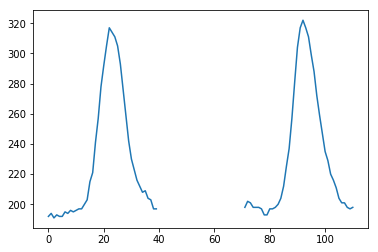

masked_array(data = [192.0 194.0 191.0 193.0 192.0 192.0 195.0 194.0 196.0 195.0 196.0 197.0
 197.0 200.0 203.0 215.0 221.0 241.0 257.0 278.0 292.0 305.0 317.0 314.0
 311.0 305.0 293.0 276.0 259.0 242.0 230.0 223.0 216.0 212.0 208.0 209.0
 204.0 203.0 197.0 197.0 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- 198.0 202.0 201.0 198.0 198.0
 198.0 197.0 193.0 193.0 197.0 197.0 198.0 200.0 204.0 212.0 225.0 237.0
 257.0 281.0 304.0 317.0 322.0 317.0 311.0 299.0 288.0 272.0 259.0 247.0
 235.0 229.0 220.0 216.0 211.0 204.0 201.0 201.0 198.0 197.0 198.0],
             mask = [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True

In [161]:
b = np.ma.masked_equal(a, 0)
plt.plot(b)
plt.show()
b


In [143]:
test_recv[:,1].compressed().shape

(40L,)

In [162]:
otherArgs.allRecv[0].shape

(136L, 3L, 65536L)

In [165]:
tot_pulses=0
for i,p in enumerate(otherArgs.allPulses):
    num_pulses = len(p)
    print ('pulses in chunk {}: {}'.format(i,num_pulses))
    tot_pulses += num_pulses
    
print('')
print('total pulses from header: {}'.format(header['NUMBER_OF_PULSES']))
print('total from chunks: {}'.format(tot_pulses))

pulses in chunk 0: 65536
pulses in chunk 1: 65536
pulses in chunk 2: 65536
pulses in chunk 3: 65536
pulses in chunk 4: 65536
pulses in chunk 5: 65536
pulses in chunk 6: 65536
pulses in chunk 7: 65536
pulses in chunk 8: 65536
pulses in chunk 9: 65536
pulses in chunk 10: 65536
pulses in chunk 11: 65536
pulses in chunk 12: 65536
pulses in chunk 13: 65536
pulses in chunk 14: 65536
pulses in chunk 15: 65536
pulses in chunk 16: 65536
pulses in chunk 17: 65536
pulses in chunk 18: 65536
pulses in chunk 19: 65536
pulses in chunk 20: 65536
pulses in chunk 21: 65536
pulses in chunk 22: 65536
pulses in chunk 23: 65536
pulses in chunk 24: 65536
pulses in chunk 25: 65536
pulses in chunk 26: 65536
pulses in chunk 27: 65536
pulses in chunk 28: 65536
pulses in chunk 29: 65536
pulses in chunk 30: 65536
pulses in chunk 31: 65536
pulses in chunk 32: 65536
pulses in chunk 33: 65536
pulses in chunk 34: 65536
pulses in chunk 35: 65536
pulses in chunk 36: 65536
pulses in chunk 37: 65536
pulses in chunk 38: 65

In [166]:
id

81